In [12]:
# --- Step 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt

# Make graphs look a bit nicer
plt.style.use('seaborn-v0_8')

In [13]:
# --- Step 2: Load the datasets ---

# CO2 emissions per capita
co2_df = pd.read_csv("co-emissions-per-capita.csv")

# Temperature anomalies by month
temp_df = pd.read_csv("global-temperature-anomalies-by-month.csv")

# Look at the first few rows
print("CO2 dataset sample:")
print(co2_df.head())

print("\nTemperature dataset sample:")
print(temp_df.head())

CO2 dataset sample:
        Entity Code  Year  emissions_total_per_capita
0  Afghanistan  AFG  1949                    0.001992
1  Afghanistan  AFG  1950                    0.010837
2  Afghanistan  AFG  1951                    0.011625
3  Afghanistan  AFG  1952                    0.011468
4  Afghanistan  AFG  1953                    0.013123

Temperature dataset sample:
  Entity  Code  Year  temperature_anomaly
0  April   NaN  1940            -0.604778
1  April   NaN  1941            -0.806757
2  April   NaN  1942            -0.803393
3  April   NaN  1943            -0.772172
4  April   NaN  1944            -0.630437


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


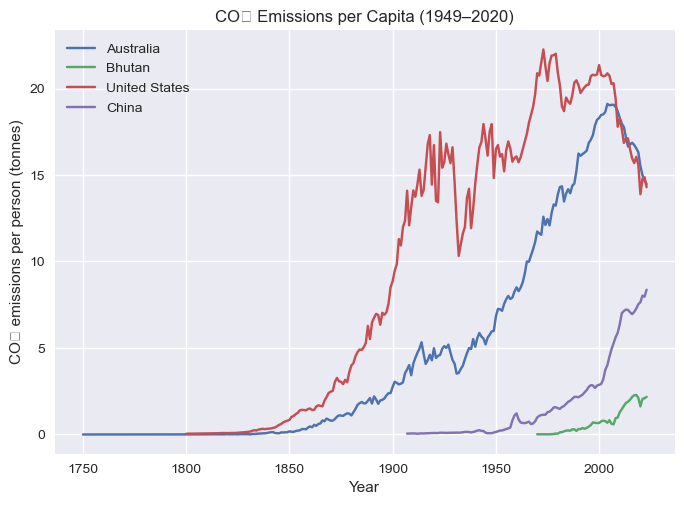

In [14]:
# --- Step 3: Plot CO2 emissions per capita for a few countries ---

countries = ["Australia", "Bhutan", "United States", "China"]

for country in countries:
    subset = co2_df[co2_df["Entity"] == country]
    plt.plot(subset["Year"], subset["emissions_total_per_capita"], label=country)

plt.xlabel("Year")
plt.ylabel("CO₂ emissions per person (tonnes)")
plt.title("CO₂ Emissions per Capita (1949–2020)")
plt.legend()
plt.grid(True)
plt.show()

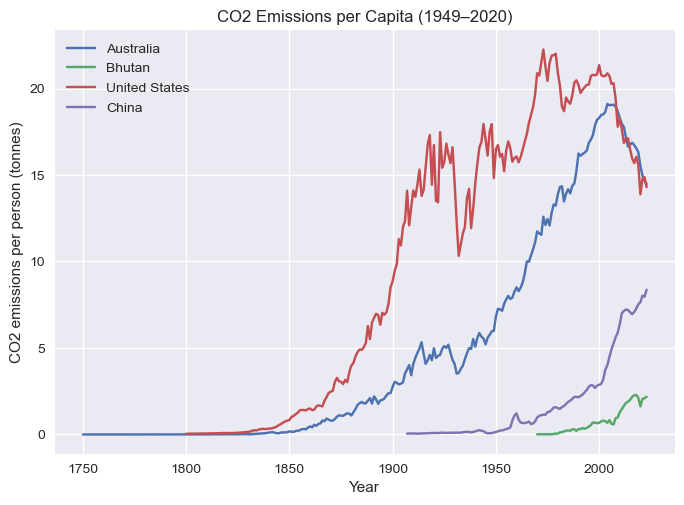

In [17]:
# --- Step 3.1: Plot CO2 emissions per capita for a few countries with error correction (Unicode) CO₂ to CO2 ---

countries = ["Australia", "Bhutan", "United States", "China"]

for country in countries:
    subset = co2_df[co2_df["Entity"] == country]
    plt.plot(subset["Year"], subset["emissions_total_per_capita"], label=country)

plt.xlabel("Year")
plt.ylabel("CO2 emissions per person (tonnes)")
plt.title("CO2 Emissions per Capita (1949–2020)")
plt.legend()
plt.grid(True)
plt.show()

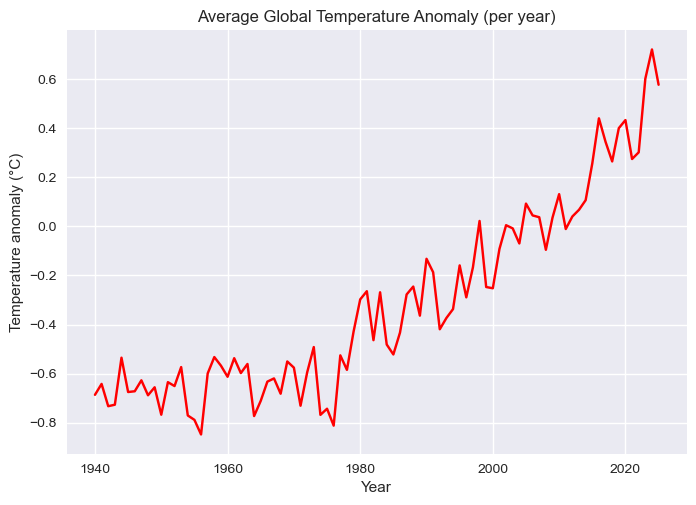

In [18]:
# --- Step 4: Global Temperature Anomalies ---
# Each "Entity" is a month (e.g. "January", "April").
# Let's look at annual averages.

# Group by Year to get an annual mean temperature anomaly
annual_temp = temp_df.groupby("Year")["temperature_anomaly"].mean().reset_index()

plt.plot(annual_temp["Year"], annual_temp["temperature_anomaly"], color="red")
plt.xlabel("Year")
plt.ylabel("Temperature anomaly (°C)")
plt.title("Average Global Temperature Anomaly (per year)")
plt.grid(True)
plt.show()

In [19]:
# --- Step 5: Mini Challenges ---

# 1. Which year had the highest global anomaly?
max_year = annual_temp.loc[annual_temp["temperature_anomaly"].idxmax()]
print(f"Highest global anomaly: {max_year['Year']} ({max_year['temperature_anomaly']:.2f}°C)")

# 2. Which country had the lowest emissions in 2000?
co2_2000 = co2_df[co2_df["Year"] == 2000]
lowest = co2_2000.loc[co2_2000["emissions_total_per_capita"].idxmin()]
print(f"Lowest emissions in 2000: {lowest['Entity']} ({lowest['emissions_total_per_capita']:.3f} tonnes/person)")

Highest global anomaly: 2024.0 (0.72°C)
Lowest emissions in 2000: Kosovo (0.000 tonnes/person)


In [20]:
# --- Step 6: Reflection Task for Students ---
# After running the code, discuss these questions in your team:
#
# 1. What do you notice about Bhutan compared to other countries?
# 2. How does the global temperature trend look over time?
# 3. What story might you want to tell the public about this data?